Topic:        Challenge Set 7

Subject:      Classification

Date:         02/05/2018

Name:         Browning Gentry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Challenge 1
* Import Dataframe/Headers
* Replace Y/N with 0/1
* Impute values for ?

In [33]:
columns = ['Class Name', 
            'handicapped-infants', 
            'water-project-cost-sharing', 
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']

In [34]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                header=None,
                names = columns)

In [38]:
df = df.replace('y',1)
df = df.replace('n',0)

total = len(df)

for col in df.columns:
    per_yes = df[col].value_counts()[0]/total
    if per_yes > .5:
        df[col] = df[col].replace('?',1)
    else:
        df[col] = df[col].replace('?',0)

# Challenge 2
* Split data into train/test

In [46]:
from sklearn.cross_validation import train_test_split
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

# Challenge 3
* KNN to predict party
* Try Nearest neighbors 1 to 20
* Report best score & nearest neighbors values

Best KNN Accuracy: 0.923664122137
Best NN value: 13


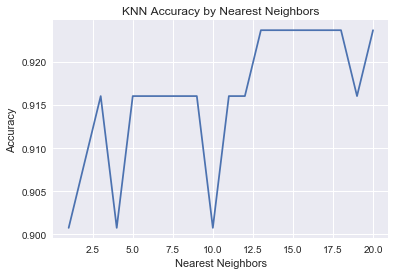

In [153]:
from sklearn.metrics import accuracy_score
score = []
nn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score.append(accuracy_score(y_test, knn.predict(X_test)))
    nn.append(i)

plt.plot(nn, score)
plt.title('KNN Accuracy by Nearest Neighbors')
plt.ylabel('Accuracy')
plt.xlabel('Nearest Neighbors');
print('Best KNN Accuracy: ' + str(max(score)))
print('Best NN value: ' + str(nn[score.index(max(score))]))


# Challenge 4
* Logistic Regression to predict party

In [160]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = (accuracy_score(y_test, lr.predict(X_test)))

print('LogReg Accuracy: ' + str(lr_score))

LogReg Accuracy: 0.946564885496


# Challenge 5
* Plotting Republicans vs Democrats
* Predicting all values as democrats and checking accuracy
* Predicting all values as republican and checking accuracy

/Users/bgentry/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


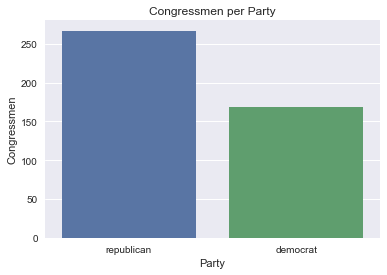

In [113]:
sns.barplot(y.unique(), y.value_counts().tolist())
plt.title('Congressmen per Party')
plt.ylabel('Congressmen')
plt.xlabel('Party');

In [114]:
def pred_dem(vals):
    output = []
    for i in range(len(vals)):
        output.append('democrat')
    return output

In [117]:
def pred_rep(vals):
    output = []
    for i in range(len(vals)):
        output.append('republican')
    return output

In [121]:
dem_acc = accuracy_score(y_test, pred_dem(X_test))
rep_acc = accuracy_score(y_test, pred_rep(X_test))
print('All Dem Accruacy: ' + str(dem_acc))
print('All Rep Accruacy: ' + str(rep_acc))

All Dem Accruacy: 0.587786259542
All Rep Accruacy: 0.412213740458


# Challenge 6
* Plot Accuracy Score Comparison

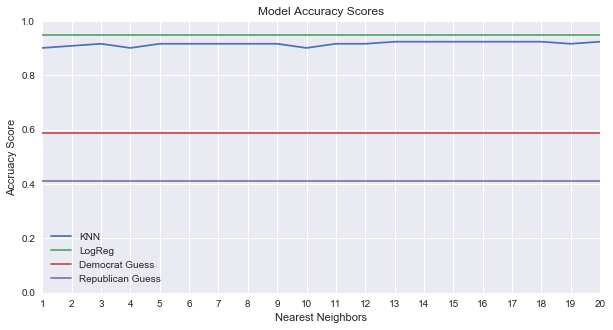

In [147]:
fig, ax = plt.subplots(figsize = (10,5))

ax.set_title('Model Accuracy Scores')
ax.set_xlabel('Nearest Neighbors')
ax.set_ylabel('Accruacy Score')
ax.plot(nn, score, label = 'KNN')
ax.plot(nn, [lr_score for i in nn], label = 'LogReg')
ax.plot(nn, [dem_acc for i in nn], label = 'Democrat Guess')
ax.plot(nn, [rep_acc for i in nn], label = 'Republican Guess')
ax.set_ylim(0,1)
ax.set_xlim(1,20)
ax.set_xticks(nn)
plt.legend();

# Challenge 7
* Learning Curve for LogReg
* Learning Curve for KNN

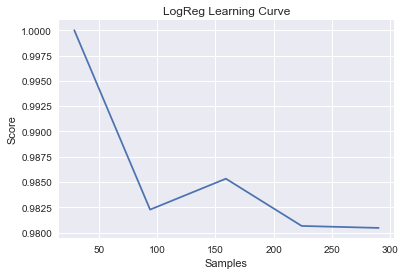

In [154]:
from sklearn.learning_curve import learning_curve
m, train_error, test_error = learning_curve(LogisticRegression(), X, y)
train_cv_err = np.mean(train_error, axis=1)
test_cv_err = np.mean(test_error, axis=1)

plt.plot(m, train_cv_err)
plt.title('LogReg Learning Curve')
plt.ylabel('Score')
plt.xlabel('Samples');

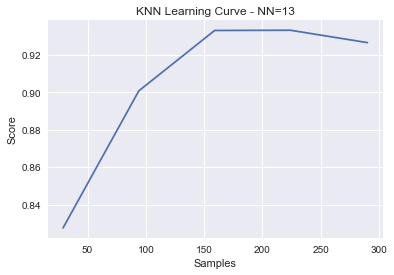

In [159]:
m, train_error, test_error = learning_curve(KNeighborsClassifier(n_neighbors = 13), X, y)
train_cv_err = np.mean(train_error, axis=1)
test_cv_err = np.mean(test_error, axis=1)

plt.plot(m, train_cv_err)
plt.title('KNN Learning Curve - NN=13')
plt.ylabel('Score')
plt.xlabel('Samples');

# Challenge 8
* Gaussian NB
* SVM
* Decision Tree
* Random Forest

In [167]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = (accuracy_score(y_test, nb.predict(X_test)))
print('GaussianNB Accuracy: ' + str(nb_score))

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_score = (accuracy_score(y_test, svc.predict(X_test)))
print('SVC Accuracy: ' + str(svc_score))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = (accuracy_score(y_test, dtc.predict(X_test)))
print('Decision Tree Accuracy: ' + str(dtc_score))

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = (accuracy_score(y_test, rf.predict(X_test)))
print('Random Forest Accuracy: ' + str(rf_score))


GaussianNB Accuracy: 0.93893129771
SVC Accuracy: 0.946564885496
Decision Tree Accuracy: 0.931297709924
Random Forest Accuracy: 0.954198473282


# Challenge 9

In [171]:
from sklearn.cross_validation import cross_val_score
knn_cv = np.mean(cross_val_score(knn, X, y))
print('KNN CV Score: ' + str(knn_cv))

lr_cv = np.mean(cross_val_score(lr, X, y))
print('LogReg CV Score: ' + str(lr_cv))

nb_cv = np.mean(cross_val_score(nb, X, y))
print('GaussianNB CV Score: ' + str(nb_cv))

svc_cv = np.mean(cross_val_score(svc, X, y))
print('SVC CV Score: ' + str(svc_cv))

dtc_cv = np.mean(cross_val_score(dtc, X, y))
print('Decision Tree CV Score: ' + str(dtc_cv))

rf_cv = np.mean(cross_val_score(rf, X, y))
print('Random Forest CV Score: ' + str(rf_cv))


KNN CV Score: 0.91724137931
LogReg CV Score: 0.96091954023
GaussianNB CV Score: 0.942528735632
SVC CV Score: 0.95632183908
Decision Tree CV Score: 0.944827586207
Random Forest CV Score: 0.963218390805


# Challenge 10
* Predict Handicapped Infants Vote based on other votes

In [172]:
y = df.iloc[:,1]
X = df.iloc[:,2:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_cv = np.mean(cross_val_score(lr, X, y))
print('LogReg CV Score: ' + str(lr_cv))


LogReg CV Score: 0.687093458598


# Challenge 11
* Movie Dataset
* Bar Graph of each Rating
* KNN/LogReg Prediction Accuracies
* Stupid Predictor Accuracy
* Comparison
* LogReg Coefficients

In [224]:
df = pd.read_csv('2013_movies.csv')
del df['Title']
from datetime import datetime
df['ReleaseDate'] = df.apply(lambda x: (datetime.now() 
                                        - datetime.strptime(x['ReleaseDate'],'%Y-%m-%d %H:%M:%S'))
                                         .total_seconds(),
                             axis=1)
df = pd.get_dummies(df, columns = ['Director'], drop_first=True)
df.dropna(inplace=True)

In [225]:
mid = df['Rating']
df.drop(labels=['Rating'], axis=1,inplace = True)
df.insert(0, 'Rating', mid)

/Users/bgentry/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


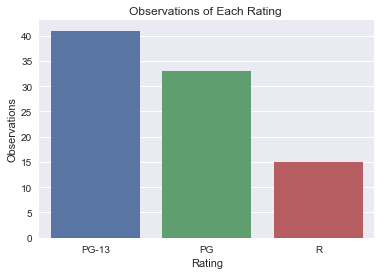

In [231]:
sns.barplot(df.Rating.unique(), df.Rating.value_counts().tolist())
plt.title('Observations of Each Rating ')
plt.ylabel('Observations')
plt.xlabel('Rating');

Best KNN Accuracy: 0.481481481481
Best NN value: 14


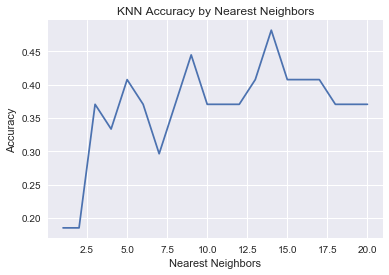

In [230]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)

score = []
nn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score.append(accuracy_score(y_test, knn.predict(X_test)))
    nn.append(i)

plt.plot(nn, score)
plt.title('KNN Accuracy by Nearest Neighbors')
plt.ylabel('Accuracy')
plt.xlabel('Nearest Neighbors');
print('Best KNN Accuracy: ' + str(max(score)))
print('Best NN value: ' + str(nn[score.index(max(score))]))

In [228]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = (accuracy_score(y_test, lr.predict(X_test)))

print('LogReg Accuracy: ' + str(lr_score))

LogReg Accuracy: 0.407407407407


In [232]:
def pred_pg13(vals):
    output = []
    for i in range(len(vals)):
        output.append('PG-13')
    return output

pg13_acc = accuracy_score(y_test, pred_pg13(X_test))
print('All Dem Accruacy: ' + str(pg13_acc))

All Dem Accruacy: 0.444444444444


### Comparison
KNN and LogReg do not do significantly better than the dumb predictor - LogReg Actually does worse

In [239]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)


d = {'Feature': X.columns,
     'Class_1_Coeff': lr.coef_[0],
     'Class_2_Coeff': lr.coef_[1],
     'Class_3_Coeff': lr.coef_[2]}
df_imp = pd.DataFrame(data=d)
df_imp.head()

,Class_1_Coeff,Class_2_Coeff,Class_3_Coeff,Feature
0,0.280221,0.313612,-0.602139,Budget
1,0.152754,-0.049058,-0.088233,DomesticTotalGross
2,-0.814219,0.776641,-0.031694,Runtime
3,-0.297977,-0.026128,0.193079,ReleaseDate
4,-0.219930,0.289203,-0.114775,Director_Alan Taylor


# Challenge 12


In [241]:
columns = ['Age','Op_Year', 'Pos_Nodes', 'Survival']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                 header=None,
                 names = columns)

In [243]:
mid = df['Survival']
df.drop(labels=['Survival'], axis=1,inplace = True)
df.insert(0, 'Survival', mid)

In [252]:
def stats_(dataframe, column):
    print (column + ' mean = ' + str(np.mean(dataframe[column]))) 
    print (column + ' standard deviation ' + str(np.std(dataframe[column])))

print('All Patients:')
stats_(df, 'Age')
print()
print('Patients 5 Years+ Survival:')
stats_(df[df.Survival == 1], 'Age')
print()
print('atients <5 Years Survival:')
stats_(df[df.Survival == 2], 'Age')
print()


All Patients:
Age mean = 52.45751633986928
Age standard deviation 10.78578520363183

Patients 5 Years+ Survival:
Age mean = 52.01777777777778
Age standard deviation 10.98765547510051

atients <5 Years Survival:
Age mean = 53.67901234567901
Age standard deviation 10.10418219303131



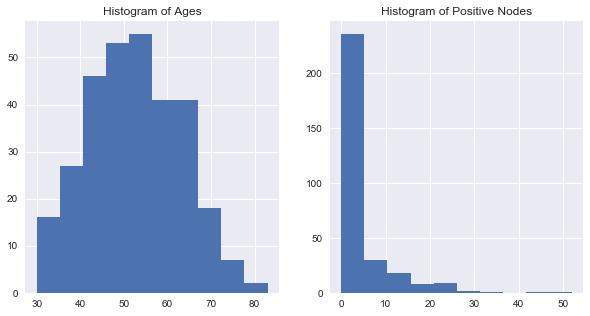

In [279]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
df.Age.hist(ax=ax[0])
ax[0].set_title('Histogram of Ages')
df.Pos_Nodes.hist(ax = ax[1])
ax[1].set_title('Histogram of Positive Nodes');

In [280]:
print('First Year of Surgery: ' + str(19) + str(min(df.Op_Year)))
print('Most Recent Year of Surgery: ' + str(19) + str(max(df.Op_Year)))

First Year of Surgery: 1958
Most Recent Year of Surgery: 1969


In [281]:
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 4444)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = (accuracy_score(y_test, lr.predict(X_test)))

print('LogReg Accuracy: ' + str(lr_score))

LogReg Accuracy: 0.815217391304


In [282]:
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)


d = {'Feature': X.columns,
     'Coeff': lr.coef_[0],}
df_imp = pd.DataFrame(data=d)
df_imp.head()

,Coeff,Feature
0,0.174679,Age
1,0.020448,Op_Year
2,0.558925,Pos_Nodes


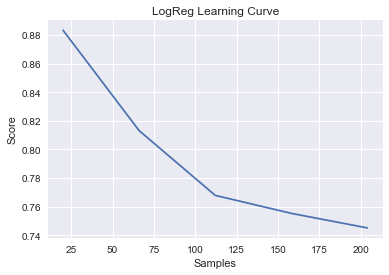

In [283]:
from sklearn.learning_curve import learning_curve
m, train_error, test_error = learning_curve(LogisticRegression(), X, y)
train_cv_err = np.mean(train_error, axis=1)
test_cv_err = np.mean(test_error, axis=1)

plt.plot(m, train_cv_err)
plt.title('LogReg Learning Curve')
plt.ylabel('Score')
plt.xlabel('Samples');